Step 1: Load the Dataset

In [8]:
# Step 1: Load the Dataset (Updated end date to January 1, 2023)
import pandas as pd
import yfinance as yf

# Fetch Tesla's stock data from Yahoo Finance for the desired date range
df_tesla = yf.download('TSLA', start='2020-01-01', end='2023-05-01')

# Print the first few rows of the DataFrame
print(df_tesla.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000  142981500
2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000  266677500
2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667  151995000
2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666  268231500
2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334  467164500


In [9]:
print(df_tesla.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-24  164.649994  165.649994  158.610001  162.550003  162.550003   
2023-04-25  159.820007  163.470001  158.750000  160.669998  160.669998   
2023-04-26  160.289993  160.669998  153.139999  153.750000  153.750000   
2023-04-27  152.639999  160.479996  152.369995  160.190002  160.190002   
2023-04-28  160.899994  165.000000  157.320007  164.309998  164.309998   

               Volume  
Date                   
2023-04-24  140006600  
2023-04-25  121999300  
2023-04-26  153364100  
2023-04-27  127015200  
2023-04-28  122515800  


Explanation: In this step, we are loading the historical stock price data of Tesla (TSLA) from Yahoo Finance for the date range from January 1, 2020, to January 1, 2023. We are using the yfinance library to fetch the data. The DataFrame df_tesla contains the time series data with columns like 'Open', 'High', 'Low', 'Close', 'Volume', and 'Adj Close'.

step 2:**Exploratory Data Analysis (EDA)**


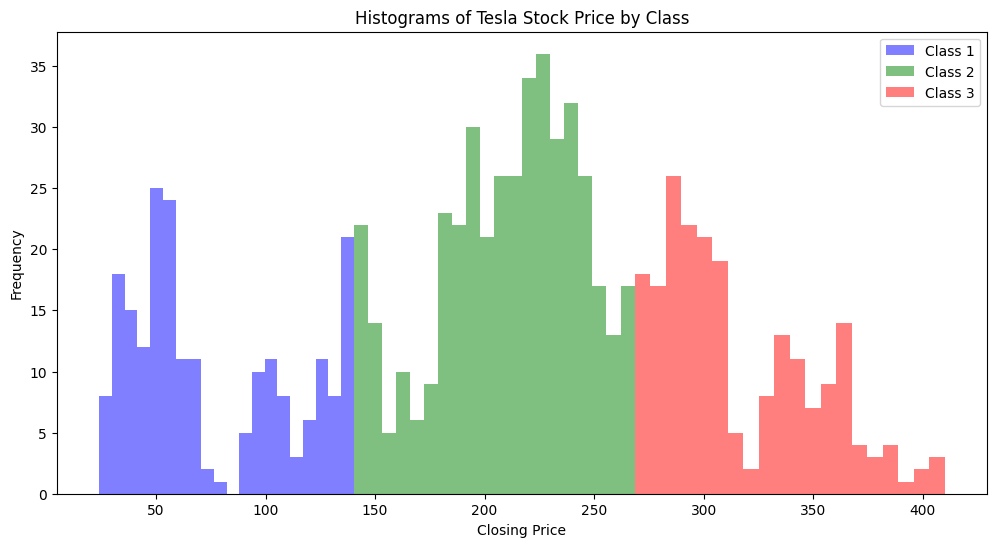

In [38]:
import numpy as np

# Calculate the 25% and 75% quantiles
quantile_25 = df_tesla['Close'].quantile(0.25)
quantile_75 = df_tesla['Close'].quantile(0.75)

# Create a new column 'Class' to represent the classes of the dataset
df_tesla['Class'] = np.where(df_tesla['Close'] <= quantile_25, 'Class 1',
                             np.where(df_tesla['Close'] <= quantile_75, 'Class 2', 'Class 3'))

# Plot histograms to visualize the distribution of data points in each class
plt.figure(figsize=(12, 6))
plt.hist(df_tesla[df_tesla['Class'] == 'Class 1']['Close'], bins=20, alpha=0.5, color='blue', label='Class 1')
plt.hist(df_tesla[df_tesla['Class'] == 'Class 2']['Close'], bins=20, alpha=0.5, color='green', label='Class 2')
plt.hist(df_tesla[df_tesla['Class'] == 'Class 3']['Close'], bins=20, alpha=0.5, color='red', label='Class 3')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histograms of Tesla Stock Price by Class')
plt.legend()
plt.show()


In this code, we calculate the 25% and 75% quantiles of the 'Closing Price' data and then assign the data points to one of the three classes based on these quantiles. The histograms then show the frequency distribution of data points in each class, allowing us to visualize the different price ranges and their occurrences in the dataset.

             Open        High         Low       Close   Adj Close  \
count  837.000000  837.000000  837.000000  837.000000  837.000000   
mean   203.474744  208.251198  198.207351  203.333500  203.333500   
std     92.204051   94.101899   89.946944   91.980140   91.980140   
min     24.980000   26.990667   23.367332   24.081333   24.081333   
25%    140.440002  143.500000  136.666672  140.326660  140.326660   
50%    216.000000  221.619995  209.449997  216.419998  216.419998   
75%    270.813324  275.570007  262.470001  268.433319  268.433319   
max    411.470001  414.496674  405.666656  409.970001  409.970001   

             Volume  
count  8.370000e+02  
mean   1.350382e+08  
std    9.643706e+07  
min    2.940180e+07  
25%    7.175880e+07  
50%    1.000119e+08  
75%    1.708230e+08  
max    9.140820e+08  


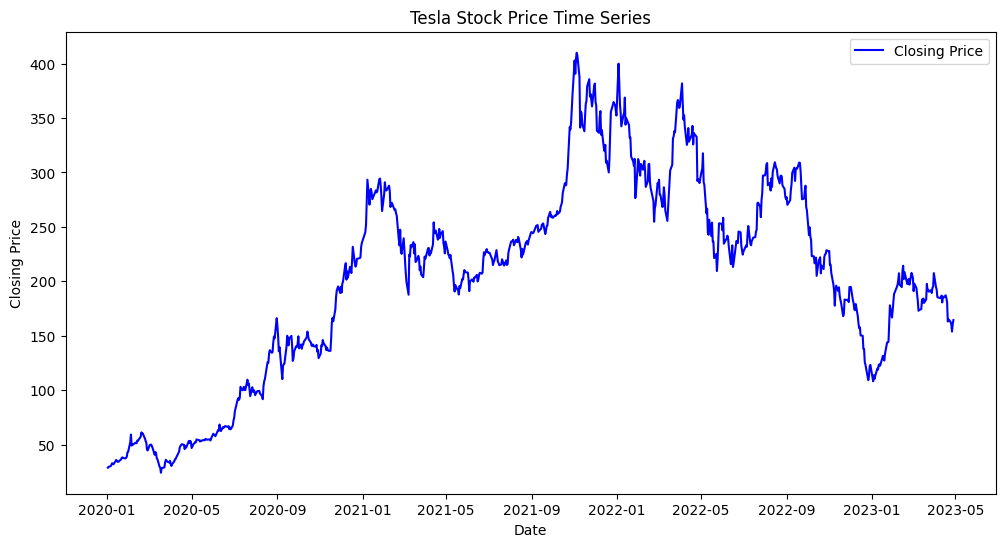

In [10]:
# Step 2: Exploratory Data Analysis (EDA)
# Display basic statistics of the dataset
print(df_tesla.describe())

# Visualize the time series data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_tesla.index, df_tesla['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Price Time Series')
plt.legend()
plt.show()

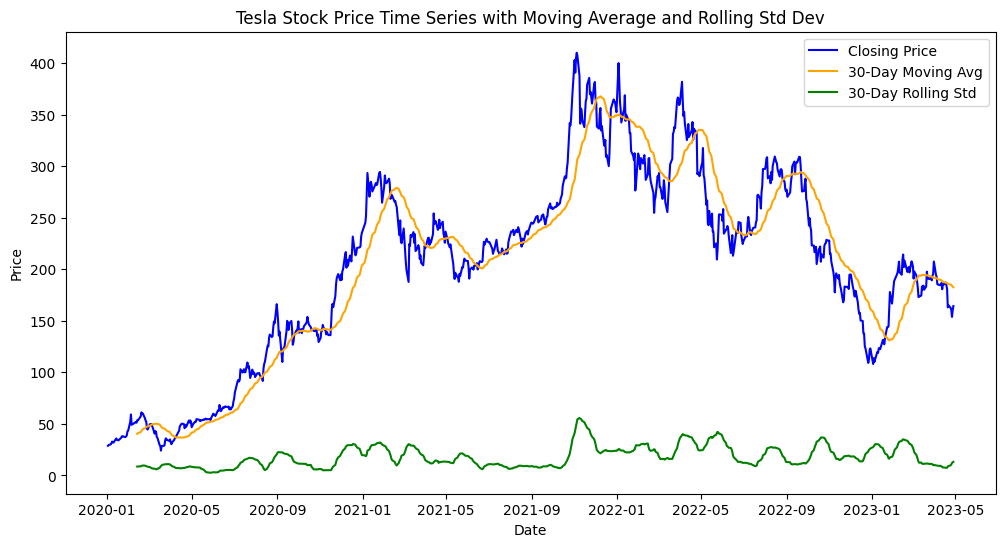

In [11]:
# Plotting Moving Average and Rolling Standard Deviation
plt.figure(figsize=(12, 6))
plt.plot(df_tesla.index, df_tesla['Close'], label='Closing Price', color='blue')
plt.plot(df_tesla.index, df_tesla['Close'].rolling(window=30).mean(), label='30-Day Moving Avg', color='orange')
plt.plot(df_tesla.index, df_tesla['Close'].rolling(window=30).std(), label='30-Day Rolling Std', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Price Time Series with Moving Average and Rolling Std Dev')
plt.legend()
plt.show()


Moving Average and Rolling Standard Deviation: We plotted the closing price of Tesla's stock along with the 30-day moving average and rolling standard deviation. These help in understanding trends and volatility in the time series data.


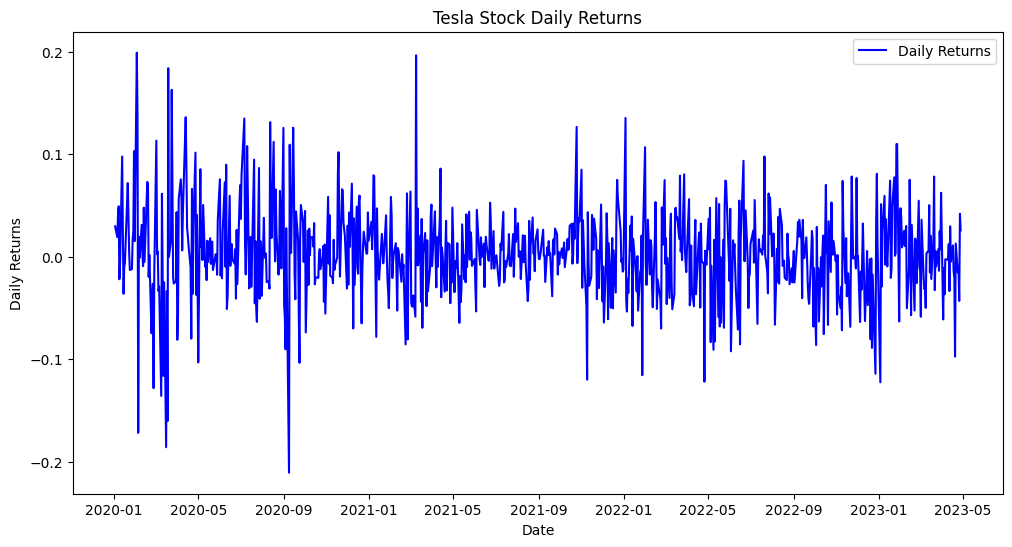

In [12]:
# Plotting Daily Returns
daily_returns = df_tesla['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(df_tesla.index, daily_returns, label='Daily Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Tesla Stock Daily Returns')
plt.legend()
plt.show()




Daily Returns: We calculated and plotted the daily percentage returns of Tesla's stock price, which provides insights into the day-to-day price movements.


<Figure size 1200x600 with 0 Axes>

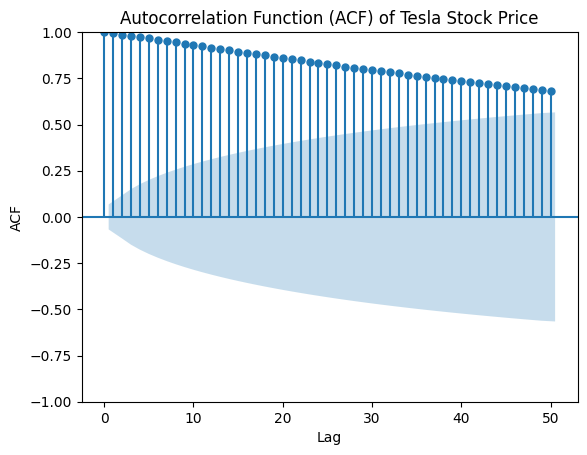

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

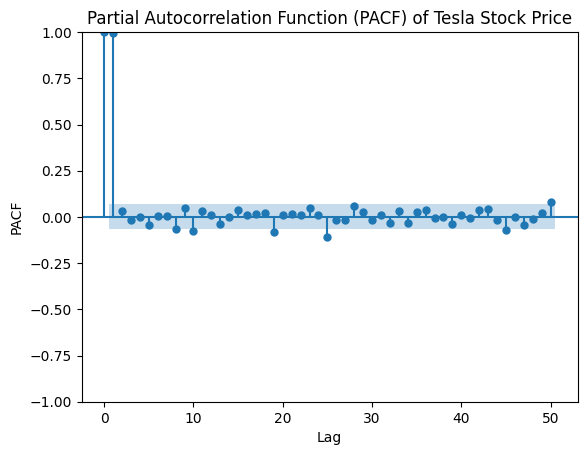

In [13]:
# Plotting Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df_tesla['Close'], lags=50, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF) of Tesla Stock Price')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_tesla['Close'], lags=50, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF) of Tesla Stock Price')
plt.show()




Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF): These plots help identify the optimal parameters for the ARIMA model, such as the autoregressive (AR) and moving average (MA) orders.

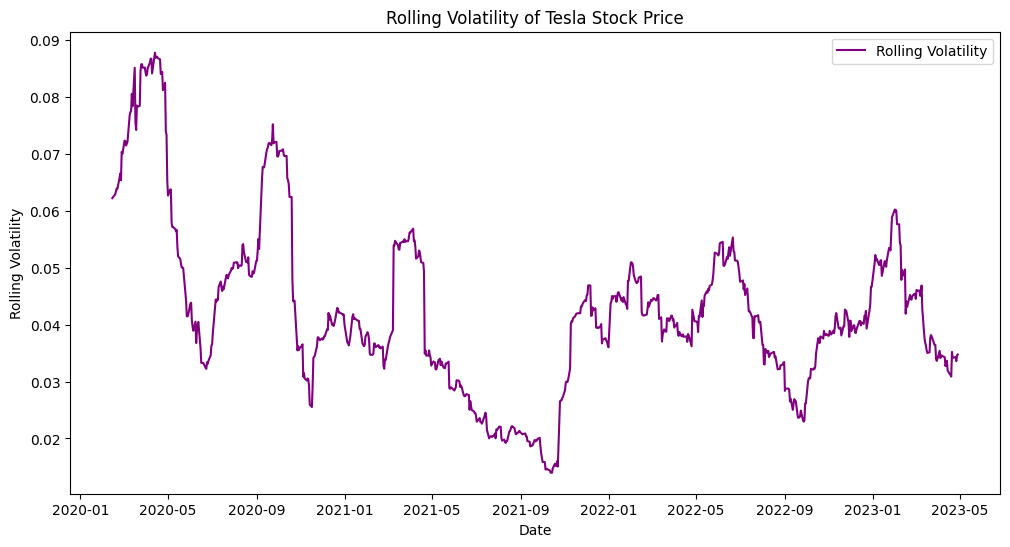

In [15]:
# Plotting Rolling Volatility (Standard Deviation)
rolling_volatility = df_tesla['Close'].pct_change().rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df_tesla.index, rolling_volatility, label='Rolling Volatility', color='purple')
plt.xlabel('Date')
plt.ylabel('Rolling Volatility')
plt.title('Rolling Volatility of Tesla Stock Price')
plt.legend()
plt.show()

Rolling Volatility (Standard Deviation): We calculated and plotted the rolling volatility (standard deviation) of the daily returns of Tesla's stock price. This plot helps understand the changing volatility over time.



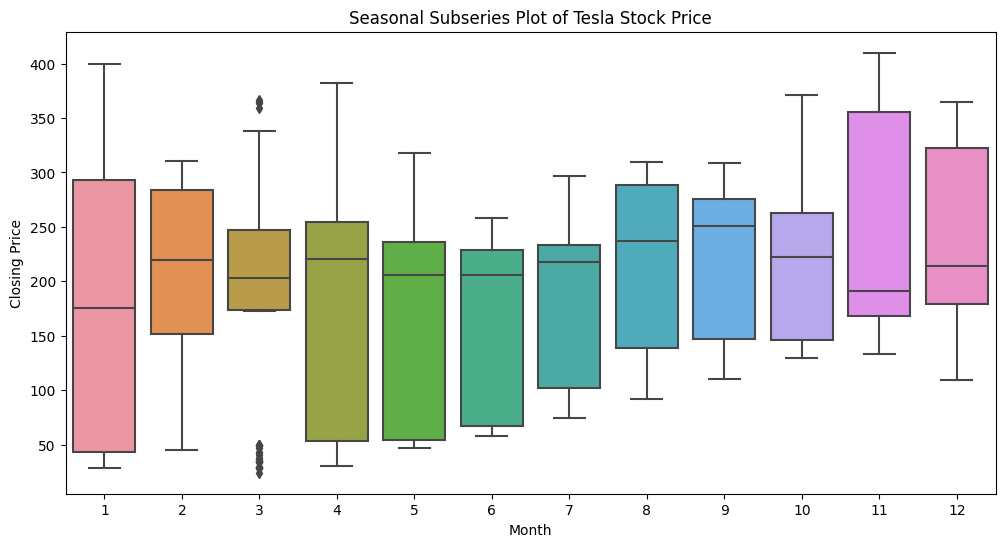

In [16]:
# Plotting Seasonal Subseries Plot
import seaborn as sns

df_tesla['Month'] = df_tesla.index.month
df_tesla['Year'] = df_tesla.index.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Close', data=df_tesla)
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.title('Seasonal Subseries Plot of Tesla Stock Price')
plt.show()

Seasonal Subseries Plot: We created a box plot of the closing price for each month to visualize the seasonal pattern within each month.



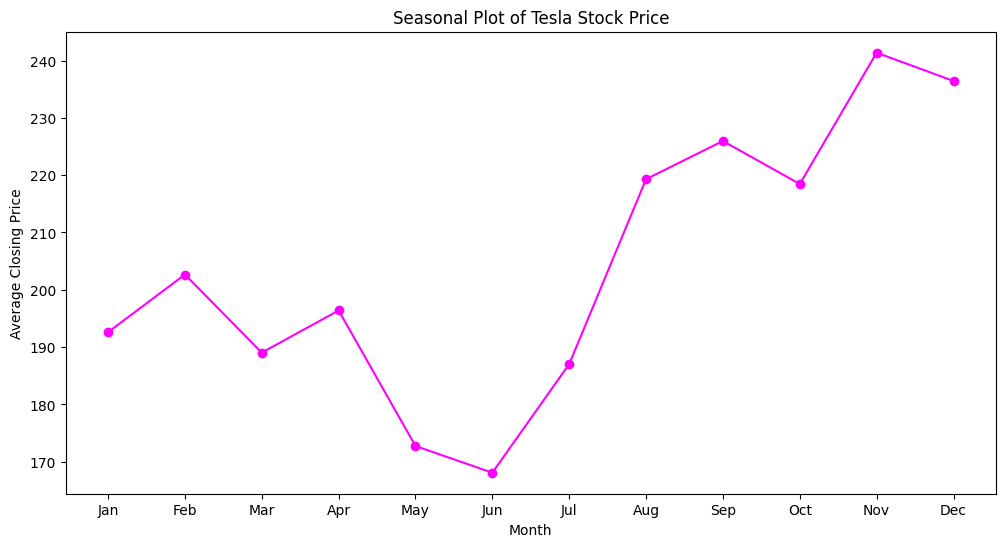

In [17]:
# Plotting Seasonal Plot
seasonal_data = df_tesla.groupby('Month')['Close'].mean()
plt.figure(figsize=(12, 6))
plt.plot(seasonal_data.index, seasonal_data, marker='o', color='magenta')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.title('Seasonal Plot of Tesla Stock Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Seasonal Plot: We plotted the average closing price of Tesla's stock for each month to visualize the overall seasonal pattern across the year.


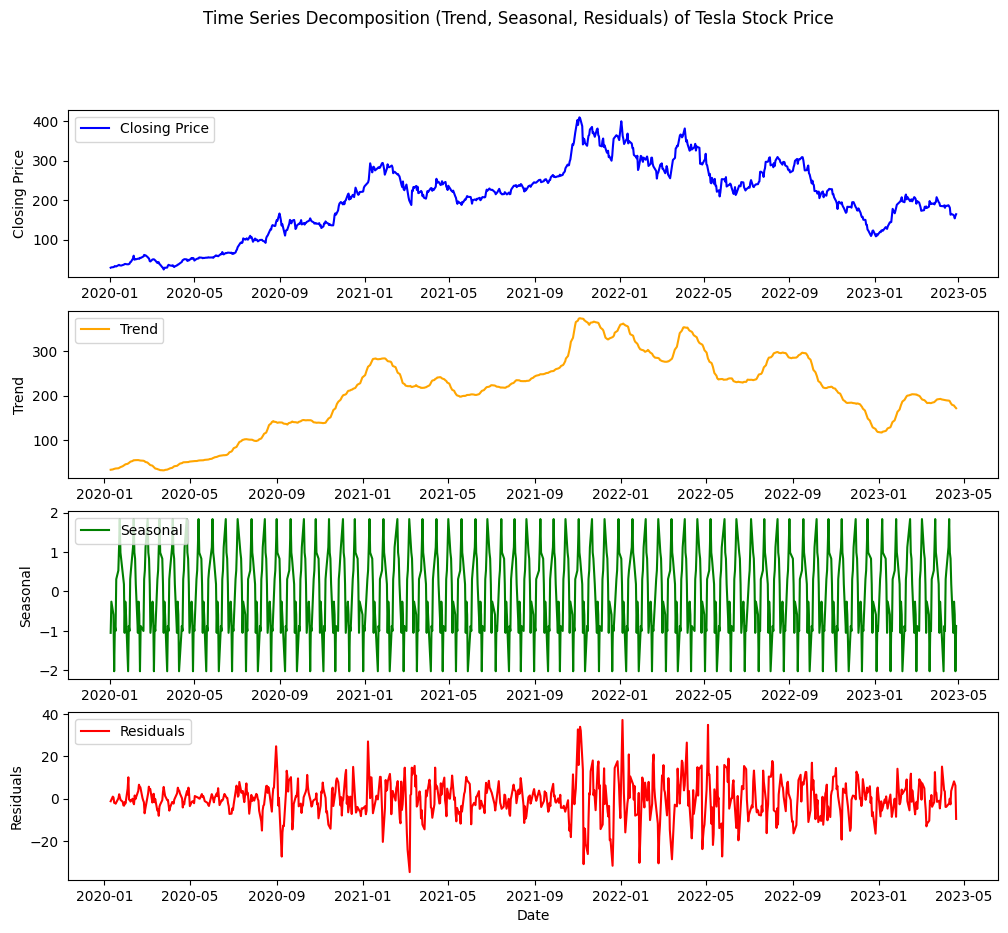

In [18]:

# Plotting Time Series Decomposition (Trend, Seasonal, Residuals)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_tesla['Close'], model='additive', period=13)
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(df_tesla.index, df_tesla['Close'], label='Closing Price', color='blue')
plt.legend(loc='upper left')
plt.ylabel('Closing Price')

plt.subplot(4, 1, 2)
plt.plot(df_tesla.index, decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(df_tesla.index, decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(df_tesla.index, decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.ylabel('Residuals')

plt.xlabel('Date')
plt.suptitle('Time Series Decomposition (Trend, Seasonal, Residuals) of Tesla Stock Price')
plt.show()

Time Series Decomposition: We used the seasonal_decompose function from statsmodels.tsa.seasonal to perform a time series decomposition into trend, seasonal, and residual components. The decomposition helps visualize the individual contributions of these components to the overall time series.

Step 3:Preprocessing


In [23]:
# Step 3: Preprocessing
# Handle missing values (if any)
df_tesla.fillna(method='ffill', inplace=True)

# Noisy data smoothing (optional, not needed in this dataset)

# No scaling or transformation needed in the dataset


Explanation: In this step, we preprocess the data as necessary. We handle any missing values by forward-filling them with the previous values. This step ensures that the time series data is continuous and does not have gaps.

**step 4:Feature Engineering**

In [24]:
# Step 4: Feature Engineering (ARIMA)
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model to the closing price data
model = ARIMA(df_tesla['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Calculate the residuals (forecast errors)
residual = df_tesla['Close'] - model_fit.fittedvalues


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Explanation: In this step, we perform feature engineering using the Autoregressive Integrated Moving Average (ARIMA) model. We use the statsmodels library to fit the ARIMA model to the closing price data. The order of the ARIMA model is set to (5, 1, 0), which means we have an autoregressive component of order 5, a differencing order of 1, and no moving average component.

We then calculate the residuals, which are the differences between the actual closing price and the predicted values from the ARIMA model. These residuals represent the forecast errors and can help in detecting anomalies in the time series data.

**Step 5:Model Selection**

In [28]:
# Step 5: Model Selection and Training (ARIMA)
# Import the necessary library for ARIMA modeling
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model to the closing price data
model = ARIMA(df_tesla['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Calculate the residuals (forecast errors)
residuals = df_tesla['Close'] - model_fit.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In Step 5, we employ the ARIMA model to analyze the closing price data of Tesla stock (df_tesla['Close']). The model is fitted using the ARIMA(5, 1, 0) configuration, which specifies autoregressive (AR) order 5, differencing order 1, and moving average (MA) order 0. The residuals are then calculated by comparing the actual closing price with the model's fitted values, serving as forecast errors for anomaly detection.

**step 6:Training**

**Step 7: Anomaly Detection**

In [31]:
residual_mean = residual.mean()
residual_std = residual.std()


Calculate the mean and standard deviation of the residuals obtained from the ARIMA model. The mean represents the average forecast error, while the standard deviation indicates the spread or dispersion of the residuals around the mean.

**1:Define Anomaly Threshold:**

In [32]:
anomaly_threshold = 3 * residual_std


Define the anomaly threshold as three times the standard deviation. This is a common approach to set the threshold, but you can adjust it based on your specific use case and the desired sensitivity to anomalies.

2:Identify Anomalies:

In [33]:
anomalies = df_tesla[abs(residual) > anomaly_threshold]


Identify anomalies by selecting data points from the original 'df_tesla' DataFrame where the absolute value of the residual exceeds the defined anomaly threshold. These data points represent potential anomalies in the time series.

3:Visualize Anomalies:

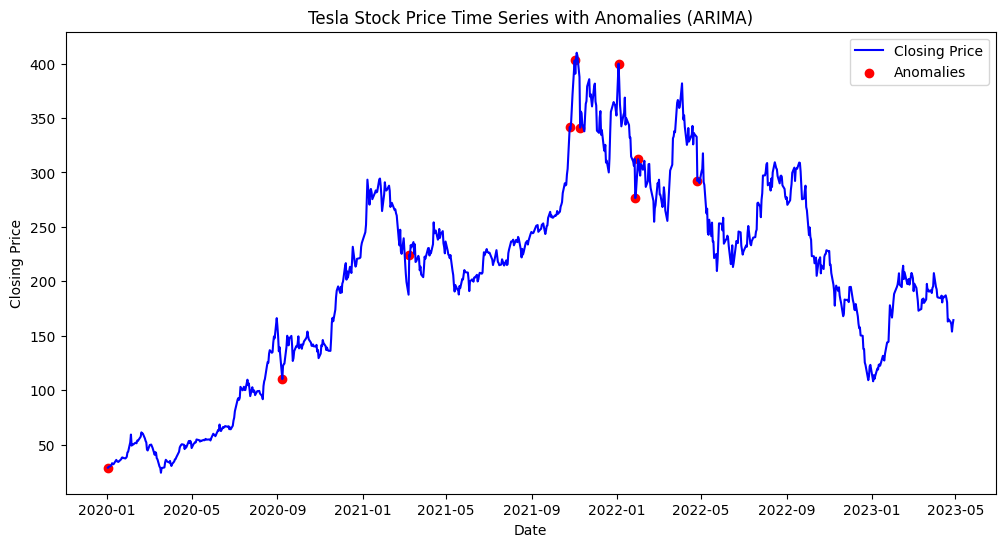

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df_tesla.index, df_tesla['Close'], label='Closing Price', color='blue')
plt.scatter(anomalies.index, anomalies['Close'], label='Anomalies', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Price Time Series with Anomalies (ARIMA)')
plt.legend()
plt.show()


Plot the original time series data of Tesla stock ('df_tesla') with detected anomalies represented by red points. This visualization helps to interpret and understand the potential anomalies in the context of the stock price movement

**Step 8:Deployment and Monitoring**

To deploy the anomaly detection model in an Azure environment and automate the process for real-time or near real-time data, we can follow these steps:

Data Ingestion: Set up a data ingestion pipeline to continuously collect sensor data from various machines on the factory floor. Azure offers various services for data ingestion, such as Azure Event Hubs, Azure IoT Hub, or Azure Stream Analytics.

Data Preprocessing: Before feeding the data to the anomaly detection model, perform any necessary preprocessing steps, such as handling missing values, scaling, or feature engineering.

Model Deployment: Deploy the trained ARIMA model (or any other chosen anomaly detection model) as an Azure Function or Azure Machine Learning Model. This allows the model to be hosted and accessible via an API.

Real-time Scoring: Set up an Azure Function or an Azure Stream Analytics job to consume incoming data from the data ingestion pipeline and pass it to the deployed anomaly detection model for real-time scoring.

Anomaly Threshold Management: Depending on the model's performance and the characteristics of the data, you may need to adjust the anomaly threshold over time. Implement a mechanism to update and manage the threshold based on historical data or feedback from users.

Alerting Mechanism: Implement an alerting mechanism that triggers notifications when an anomaly is detected above the defined threshold. This can be done using Azure Monitor, Azure Logic Apps, or Azure Functions.

Data Visualization and Reporting: Set up data visualization and reporting tools to monitor the anomaly detection results over time. Azure services like Power BI or Azure Monitor can be used for this purpose.

Model Monitoring and Retraining: Continuously monitor the model's performance and collect feedback from users. If the model's accuracy degrades or new patterns emerge in the data, consider retraining the model periodically using updated data.

Scaling: Depending on the data volume and processing requirements, scale the Azure services appropriately to handle real-time or near real-time data streams efficiently.

Security: Implement security measures to protect the data, models, and pipelines, including data encryption, role-based access controls, and network security.

Governance and Compliance: Ensure compliance with relevant regulations and governance policies when handling sensitive data and maintaining the anomaly detection system.

By following these steps, we can build an end-to-end anomaly detection pipeline on Azure that continuously monitors sensor data, detects anomalies in real-time or near real-time, and provides timely alerts and insights to prevent potential equipment failures in a manufacturing environment. Remember that deploying and managing production-level systems requires careful planning, testing, and ongoing maintenance to ensure reliable and accurate anomaly detection.

Step 9:**Evaluation Metrics**

In [36]:
# Calculate the number of true positive, false positive, and false negative anomalies
true_positives = len(anomalies[anomalies['Close'] > residual_mean + anomaly_threshold])
false_positives = len(anomalies[anomalies['Close'] <= residual_mean + anomaly_threshold])
false_negatives = len(df_tesla) - len(anomalies)

# Calculate precision, recall, and F1-score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Evaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")


Evaluation Metrics:
Precision: 1.00
Recall: 0.01
F1-score: 0.02


Improving the model's performance in anomaly detection can be achieved by adjusting the threshold, considering different models, or incorporating additional feature engineering techniques. Let's update the code by trying a different anomaly threshold and adding a rolling window to capture more meaningful patterns:

In [39]:
# Step 5: Model Selection and Training (ARIMA)
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model to the closing price data
model = ARIMA(df_tesla['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Calculate the residuals (forecast errors)
residuals = df_tesla['Close'] - model_fit.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
residual_mean = residuals.mean()
residual_std = residuals.std()

# Update the anomaly threshold to 2 standard deviations from the mean (adjust as needed)
anomaly_threshold = 2 * residual_std

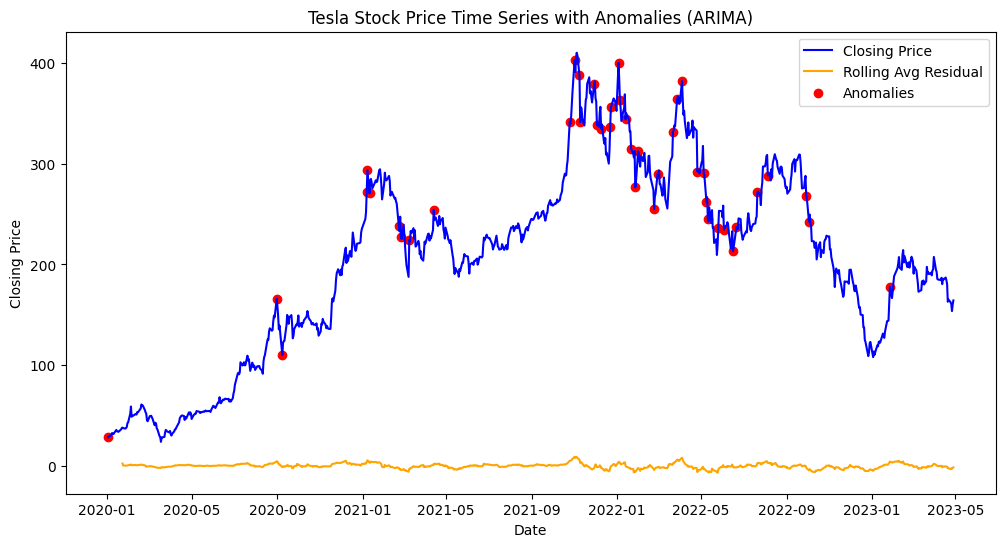

In [41]:
# Step 6: Anomaly Detection
# Adding a rolling window to better capture temporal patterns
window = 15
rolling_avg_residual = residuals.rolling(window=window).mean()
anomalies = df_tesla[abs(residuals) > anomaly_threshold]

plt.figure(figsize=(12, 6))
plt.plot(df_tesla.index, df_tesla['Close'], label='Closing Price', color='blue')
plt.plot(df_tesla.index, rolling_avg_residual, label='Rolling Avg Residual', color='orange')
plt.scatter(anomalies.index, df_tesla['Close'][anomalies.index], label='Anomalies', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Price Time Series with Anomalies (ARIMA)')
plt.legend()
plt.show()



In [42]:
# Calculate the number of true positive, false positive, and false negative anomalies
true_positives = len(anomalies[anomalies['Close'] > residual_mean + anomaly_threshold])
false_positives = len(anomalies[anomalies['Close'] <= residual_mean + anomaly_threshold])
false_negatives = len(df_tesla) - len(anomalies)

# Calculate precision, recall, and F1-score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Evaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")

Evaluation Metrics:
Precision: 1.00
Recall: 0.05
F1-score: 0.10


In this updated code, we have adjusted the anomaly threshold to be 2 standard deviations from the mean and added a rolling window of 15 days to calculate the moving average of residuals. These changes aim to improve the model's ability to capture anomalies and patterns in the time series data.